# Analisis media sosial dengan topik tertentu

In [1]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from tweepy import OAuthHandler
import datetime

import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import nltk

#### Business Understanding: alasan dan tujuan pemilihan topik

Terdapat sejumlah pernyataan Menpora yang kontroversial akhir-akhir ini. Isu terkait Menpora menghangat di twitter ketika tim bulu tangkis Indonesia memenangkan piala Thomas. Saat penyerahan piala, bendera Indonesia dilarang berkibar di podium dikarenakan sanksi dari IOC karena Indonesia tidak mampu memenuhi standar tes doping pada 2020. Namun Menpora seperti menyepelekan hal ini. Kontroversi berlanjut ketika pebulutangkis Indonesia menyindir tidak adanya bonus dari Pemerintah Indonesia, yang kemudian muncul serangan yang diduga buzzer dari Menpora. Hingga terakhir serangan buzzer juga terus dilakukan untuk menutup isu Indonesia yang mundur dari Kejuaraan Dunia Bulu Tangkis 2021.

Untuk itu, menarik untuk melihat sentimen sosial media terkait isu dan kinerja Menpora.

#### Data collection


In [11]:
# Twitter dari 4 hari kebelakang hingga hari ini. 

with open("token.json")as f:
    tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

#buat variabel authentikasi dan api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [12]:
search_words = "Menpora"
date_since = "2021-12-08"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        since=date_since).items()


In [13]:
items = []
for tweet in tweets:
    items.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))

hasil = pd.DataFrame(data=items, columns=['tweet'])

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

In [14]:
hasil

,tweet
0,Top News Koran Rakyat Merdeka Lagi Merah Putih...
1,1000 tuit buat ginian Tai bener ya Menpora gob...
2,Capek2 berjuang angkat besi buat indo Meanwhil...
3,Yup momentum tagar AtletHarusPaham diambil ali...
4,Sebaiknya Menpora mundur dan diganti dgn yg pa...
...,...
1055,Gak apa2 mundur toh ini cuma kejuaraan dunia k...
1056,Ini salah satu alesannya karna menpora gasi Gu...
1057,Tuh kan kalo sampe grgr menpora anj bgtsi
1058,gue jadi curiga mundur dari kejurdun ini gara ...


In [39]:
# Simpan semua data mentah ke dalam csv(misal tweets_buruh.csv atau news_buruh_csv)
hasil.to_csv('tweets_menpora.csv')

#### Data Preparation

In [3]:
# Text-Preprocessing, EDA, dan langkah pembersihan dan persiapan lainnya.
hasil = pd.read_csv('tweets_menpora.csv') 

In [4]:
#.Lakukan Preprocessing pada dataset. Simpan kedalam kolom baru dengan nama clean_tweet.
#a. Case folding
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data

#b. Menghilangkan stopwords
def stopword_cleaner(data):
    sw_indonesia = stopwords.words('indonesian')
    data  = [word for word in data if word not in sw_indonesia]
    data = ''.join(data)
    return data

#c. Menghilangkan bahasa slang
def slang_cleaner(data):
    slang_list = [
        #(slang_word,fixed_word)
    ]
    
    word_token = word_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data

clean_tweet = hasil.copy()
clean_tweet['tweet'] = clean_tweet['tweet'].apply(lambda x: case_folding(x))
clean_tweet['tweet'] = clean_tweet['tweet'].apply(lambda x: stopword_cleaner(x))
clean_tweet['tweet'] = clean_tweet['tweet'].apply(lambda x: slang_cleaner(x))

#3. Tampilkan head dataframe terbaru
clean_tweet.head()

,Unnamed: 0,tweet
0,0,ini jatoh nya yg bayar yg miskin yg bayar menp...
1,1,juara piala dunia pertama tanpa bantuan menpora
2,2,menpora mana paham
3,3,sudah waktunya presiden adakan reshuffle utk m...
4,4,prestasi menpora sekarang adalah membuat bende...


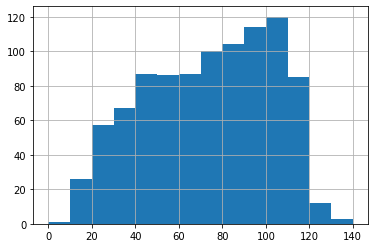

In [5]:
#Text Data Analytic
#Distribusi Frekuensi karakter per tweet

bin_range = np.arange(0, 150, 10)
clean_tweet['tweet'].str.len().hist(bins=bin_range)
plt.show()

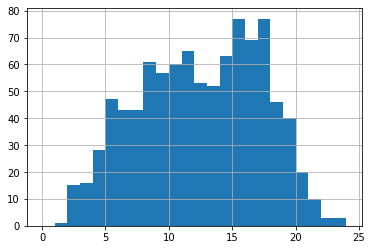

In [6]:
# Distribusi panjang kata per tweet
bin_range = np.arange(0, 25)
clean_tweet['tweet']. str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

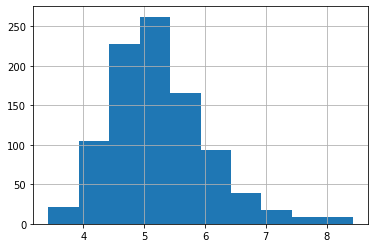

In [7]:
#Distribusi panjang rata-rata kata per tweet
clean_tweet['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

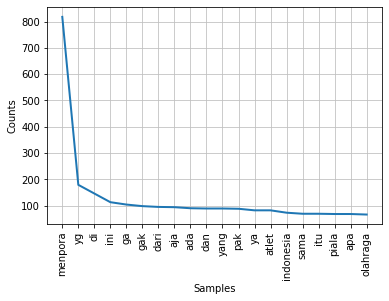

In [8]:
#Distribusi Kata
clean_tweet['tweet'] = clean_tweet['tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in clean_tweet['tweet'] for word in tweet]
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(20)
fqdist.plot(20,cumulative=False)

plt.show()

In [9]:
#Distribusi bi-gram
result = pd.Series(nltk.ngrams(tweets, 5)).value_counts()[:10]
print(result)

(keputusan, pbsi, mundur, dari, kejuaraan)    7
(tak, ikut, campur, keputusan, pbsi)          6
(mundur, dari, kejuaraan, dunia, bwf)         6
(menpora, akui, tak, ikut, campur)            5
(dari, kejuaraan, dunia, bukan, urusan)       4
(air, tentu, ini, merupakan, sesuatu)         4
(mundurnya, timnas, bulu, tangkis, dari)      4
(tangkis, dari, kejuaraan, dunia, bukan)      4
(bulu, tangkis, dari, kejuaraan, dunia)       4
(ini, diikuti, oleh, atlet, dari)             4
dtype: int64


#### Data Processing

##### sentiment analysis

In [17]:
# buka file list kata positif dan negatif yang kita punya lalu untuk setiap kalimat yang kita miliki kita akan menghitung terdapat berapa kata positif dan negatif.
# Hasil perhitungan kita masukkan ke dalam dataframe pandas agar lebih mudah untuk memanipulasi dan melihat
# Lalu kita coba cari nilai rata-rata dan standar deviasinya.

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()  

hasil = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    # print ("-----------------------------------------------------")
    
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))


Top News Koran Rakyat Merdeka Lagi Merah Putih Dilarang Berkibar Pak Menpora Sampai Kapan Harus Begini
dilarang
 ['negatif']
berkibar
 ['positif']
positif: 1
negatif: 1
1000 tuit buat ginian Tai bener ya Menpora goblog emang kok
tai
 ['negatif']
emang
 ['negatif']
kok
 ['negatif']
positif: 0
negatif: 3
Capek2 berjuang angkat besi buat indo Meanwhile yang katanya Menpora emang angkat besi itu cabor ya
emang
 ['negatif']
positif: 0
negatif: 1
Yup momentum tagar AtletHarusPaham diambil alih sama BL jadi isinya komentar ddan kritik terhadap kebij
kritik
 ['negatif']
positif: 0
negatif: 1
Sebaiknya Menpora mundur dan diganti dgn yg paham perjuangan di medan olahraga RI
mundur
 ['negatif']
positif: 0
negatif: 1
Catnobi Worst menpora ever Eh bukan menpora Menbola
positif: 0
negatif: 0
Pak menpora kenal rahmat gak ya
positif: 0
negatif: 0
yang tweetnya ada kata menpora hapus saja Tebak pengguna jasa buzzeRp laknatullah
positif: 0
negatif: 0
Buat apa ada Menpora tidak ikut andil ke olah raga
po

positif: 0
negatif: 2
abis MENPORA yg tidak muda dan tidak berolahraga
positif: 0
negatif: 0
Untung pak yg jadi gubernur indonesia coba kalo beliau jadi menpora pasti banyak yg protes
banyak
 ['positif']
protes
 ['negatif']
positif: 1
negatif: 1
Melihat tujuan dan manfaat dari acara ini Kemenpora memberikan dukungan penuh sehingga UIBG kali ini berkesempatan
positif: 0
negatif: 0
Itu MENPORA tdk di copot ya
positif: 0
negatif: 0
Ingin menghujat menpora tapi malaikat Atid sedang menatapku
menghujat
 ['negatif']
positif: 0
negatif: 1
abis Saking butuh validasi kalo dia adalah menpora
positif: 0
negatif: 0
Tunggu negonya blm selesai Menpora Goblok
goblok
 ['negatif']
goblok
 ['negatif']
positif: 0
negatif: 2
Udh dibilang turunkan menpora ayo pak mau sampai kpn dipertahankan
ayo
 ['positif']
positif: 1
negatif: 0
ehh itu yang nomor 2 atletnya yang di jelek in menpora itu bukan sih
jelek
 ['negatif']
jelek
 ['negatif']
positif: 0
negatif: 2
pasti pak menpora juga ga kenal siapa Rahmat Erwin

positif: 0
negatif: 0
Bisa di ganti asal pakde mau mana menpora skrg kan baru di ganti kan smnjk pak imam kena
bisa
 ['positif']
asal
 ['negatif']
positif: 1
negatif: 1
Oh iya sampe gak perhatikan ke sana saking kecilnya Entah kapan bisa berkibar lagi Apa kabar nih LADI apa kab
entah
 ['negatif']
bisa
 ['positif']
berkibar
 ['positif']
positif: 2
negatif: 1
Cabang2 yg kayak gini mestinya yg dapet prioritas dan perhatian menpora
mestinya
 ['negatif']
positif: 0
negatif: 1
menpora pukimak
positif: 0
negatif: 0
Itulah mengapa menpora kita gak tepat menpora yang artinya menteri pemuda dan olahraga malah di neg
positif: 0
negatif: 0
Itulah mengapa menpora kita gak tepat menpora yang artinya menteri pemuda dan olahraga ma
positif: 0
negatif: 0
Ntar dibilang ga bergengsi lagi sama menpora
positif: 0
negatif: 0
Apa kabar menpora
positif: 0
negatif: 0
Coba ket Pialala Menpora wani rotasi ora gur kui2 wae le main lakyo ra bingung to saiki do absen ro akum
bingung
 ['negatif']
bingung
 ['negatif'

positif: 0
negatif: 0
itu maksudnya yang bikin analisis gitu2 wkwkw kita liat dulu gimana developernya menpora
positif: 0
negatif: 0
Milih menpora aja nggak pernah bener Yang gak ngerti olahraga korupsi lah
korupsi
 ['negatif']
positif: 0
negatif: 1
Menpora sebut NTB sentra atlet muda berbakat By ANTARA News Arenanews
berbakat
 ['positif']
positif: 1
negatif: 0
Menpora sebut NTB sentra atlet muda berbakat By ANTARA News Arenanews
berbakat
 ['positif']
positif: 1
negatif: 0
Bisa Mas asal federasi sama Menpora support betul
bisa
 ['positif']
asal
 ['negatif']
betul
 ['positif']
positif: 2
negatif: 1
Tadi lewat daerah Fatmawati Tiba2 ngliat fotonya menpora di videotron banyak gede dan cemerlang Beliau ini prestasinya apa sih
banyak
 ['positif']
cemerlang
 ['positif']
positif: 2
negatif: 0
Harusnya atletik dan aquatik mulai dilirik menpora Dibina bener2 pembinaan atletnya karna di setiap aj
harusnya
 ['negatif']
dibina
 ['positif']
positif: 1
negatif: 1
Wah kudu lapor Menpora lak an Nek ur

positif: 0
negatif: 0
Menpora said nanti saya bicarakan dgn presiden ya di UU tidak dijelaskan rinci ke
positif: 0
negatif: 0
Betul reshuffle menpora Pak secepatnya untuk olahraga Yang lebih Baik athletes atli
betul
 ['positif']
baik
 ['positif']
positif: 2
negatif: 0
Mengapa Menpora RI sering membuat masalah Yang Hambalang yang Panci yang dana hibah Komi
masalah
 ['negatif']
positif: 0
negatif: 1
RI Menpora nya ngerti olahraga atau engga sih Serius nanya
positif: 0
negatif: 0
Menpora Dukung Keputusan PBSI Mundur dari Kejuaraan Dunia BWF
mundur
 ['negatif']
positif: 0
negatif: 1
Liga 1 dan Liga 2 tetap bisa berjalan atas rekomendasi Kemenpora PSSI pun mengapresiasi upaya Menpora Zainudin Ama
bisa
 ['positif']
positif: 1
negatif: 0
Sbnernya jamannya menpora imam nahrawi bagus sih Bener nge apresiasi atlit Cuma kaget aja napa bisa ampe korupsi
bagus
 ['positif']
apresiasi
 ['positif']
cuma
 ['negatif']
bisa
 ['positif']
korupsi
 ['negatif']
positif: 3
negatif: 2
Alasan simpelnya bikin ke

positif: 0
negatif: 0
Malah sebaiknya Menpora diganti aja kl menurut saya Org nya tidak ber
positif: 0
negatif: 0
Ketum PSSI Puji Menpora Amali yang Selalu Menginisiasi Strategi Penyelenggaraan Kemenpora
positif: 0
negatif: 0
Maaf menpora nya aja ngga kenal sama atlet nya
positif: 0
negatif: 0
Yg saya lupa adalah beliau wartawan yg memang tugas nya adalah menulis
lupa
 ['negatif']
positif: 0
negatif: 1
Di Mataram siang ini membersamai Pak Menteri Olah Raga dalam mensosialisasikan Disain Besar Olah Raga Nasional DBO
positif: 0
negatif: 0
Dulu pengamat video scandal artis dijadiin menpora skrg aki2 ga paham olahraga pula hrsnya mant
positif: 0
negatif: 0
Menpora Amali Terima Penghargaan Kategori Pelopor Pengembangan Olahraga dari KONI Pusat
positif: 0
negatif: 0
RI katanya kemarin mau diurusin Kok masih dilarang Berarti menpora cuma ngebacot doang kemarin
kok
 ['negatif']
dilarang
 ['negatif']
cuma
 ['negatif']
positif: 0
negatif: 3
yuntho MENPORA WAKANDA Titipan Mafia parpol
mafia
 ['ne

positif: 0
negatif: 1
ultra finest Makan tuh proses dari piala menpora udah ga menyakinkan masih di bilang mau proses
positif: 0
negatif: 0
15 waduh yakin meredam kalau jatuhnya kayak piala menpora gimana untung hari ini Ernando maine sangar he
waduh
 ['negatif']
sangar
 ['negatif']
positif: 0
negatif: 2
Aji memang beralasan jika babak pertama untuk meredam serangan persib karena dia mengetahui taktik per
positif: 0
negatif: 0
Mnrt sy sih alasan terbesarnya soal kekecewaan dg kemenpora utamanya menpora nya Kasus buzzer yg nyera
kekecewaan
 ['negatif']
kasus
 ['negatif']
positif: 0
negatif: 2
Dibuka Menpora Rakernas KONI Siapkan Event Nasional Pendamping PON
positif: 0
negatif: 0
ferry Ditag ke partai demokrat aja brooo atau AHY sm Ibas atau mantan menpora yg gak hapal lagu Nasional
positif: 0
negatif: 0
Di larang menpora x Tkut ad yg menang tar d suruh kasih bonus lagi gk punya duit die bonus
bonus
 ['positif']
bonus
 ['positif']
positif: 2
negatif: 0
Mari kita seru akun di instagram B

positif: 1
negatif: 0
Penilaian atas Teddy amp Rene ini mestinya kelar di final Menpora Mungkin masih bisa kasih 3 poin di 1 2 laga kecil
mestinya
 ['negatif']
bisa
 ['positif']
positif: 1
negatif: 1
Biar Menpora ga ditagih bonus kalau ada yg juara mungkin
ditagih
 ['negatif']
bonus
 ['positif']
positif: 1
negatif: 1
Saya bkn buzzer Saya tdk membela Menpora PBSI Km yg Badut Mattias Boe aja mengkritik BWF dgn
mengkritik
 ['negatif']
positif: 0
negatif: 1
Efek umbar janji palsu
umbar
 ['negatif']
palsu
 ['negatif']
positif: 0
negatif: 2
tanpa pluim di persija gak ada pluim juara piala menpora sama rohitchand wkwkw
positif: 0
negatif: 0
lebih cocok jadi menpora daripada menko perek
cocok
 ['positif']
positif: 1
negatif: 0
hamam lukas If you know alasan omicron itu hanya kamu
hanya
 ['negatif']
positif: 0
negatif: 1
finest Proses nepi iraha deui ajigg ti piala menpora proses proses wae proses degradasi
degradasi
 ['negatif']
positif: 0
negatif: 1
Miskin taktik dri piala menpora gameplay sa

positif: 0
negatif: 0
Gila ya ego menpora setinggi langit sampe rela ngilangin kesempatan indonesia dapet prestasi
gila
 ['negatif']
gila
 ['negatif']
positif: 0
negatif: 2
Menpora sudh melukai atlet Bulutangkis Indonesia pak Mereka berjuang tanpa bendera merah putih kar
melukai
 ['negatif']
positif: 0
negatif: 1
TRAGEDI OLAHRAGA MENPORA RI TIDAK TAHU THOMAS CUP AJANG BERGENGSI ATAU TIDAK ANEH BIN AJAIB Untuk Menjaga
tragedi
 ['negatif']
aneh
 ['negatif']
positif: 0
negatif: 2
Menpora menyebut bonus untuk tim bulu tangkis Indonesia yang menjuarai Piala Thomas akan langsung diberikan kepada
bonus
 ['positif']
positif: 1
negatif: 0
BangFu Iya juga si bang gantiin menpora bisa kali
bisa
 ['positif']
positif: 1
negatif: 0
Ketum PSSI Puji Menpora Amali yang Selalu Menginisiasi Strategi Penyelenggaraan Persepakbolaan di Tanah Air
positif: 0
negatif: 0
Gaungkan kepada Presiden pecat menteri yang tidak becus Seperti Menpora MenporaHarusPaham KemenporaHarusPaham
pecat
 ['negatif']
becus
 ['posi

positif: 0
negatif: 0
kirain pada menpora wkwk
positif: 0
negatif: 0
Hukuman dari Menpora terkait bonus thomas cup
hukuman
 ['negatif']
bonus
 ['positif']
positif: 1
negatif: 1
Klo kata menpora nya bisa lah nanti kita lobi lobi
bisa
 ['positif']
positif: 1
negatif: 0
Menpora tolol wajib dibuang Pak
tolol
 ['negatif']
dibuang
 ['negatif']
positif: 0
negatif: 2
gepeng Suruh menpora jualan SDSB PORKAS
positif: 0
negatif: 0
Menpora Sambut Baik Wacana PSSI untuk Uji Coba Hadirkan Suporter di Perempat Final Liga 2
baik
 ['positif']
positif: 1
negatif: 0
jadi Nah ini yg ngakak dipikir bonus sumbernya dari saku pribadi pak menpora ya wkwk
bonus
 ['positif']
positif: 1
negatif: 0
ya kak kita jg tau tp kan disini tu masalahnya masi panas ya gausa bawa hal2 yg bakal panas jg gt mksdku
positif: 0
negatif: 0
Kok harta menpora sih Emg duit pribadi menpora
kok
 ['negatif']
positif: 0
negatif: 1
kobong18 id Isih ono yo sing jadika
positif: 0
negatif: 0
id RI Menpora paling paling koq bisa jadi menteri

positif: 0
negatif: 0
oala kukira menpora sini uda dugundugun takut gbs brgkt kalo menpora sini
takut
 ['negatif']
positif: 0
negatif: 1
Dia itu pengamat politik mana ngerti WADA Persis kayak Menpora ngak tau Fajri
positif: 0
negatif: 0
Feri Masalah bendera mungkin Takut menpora malu lagi Bendera PBSI yang berkibar di podium tertinggi
masalah
 ['negatif']
takut
 ['negatif']
berkibar
 ['positif']
positif: 1
negatif: 2
Menpora sudah pasang 3 baliho di kota Mataram pemasukan pajak amp advertising
positif: 0
negatif: 0
dr kapan dah gue udh mau nangis liatnya masalah dopping jg dulu bendera gaboleh naik di hate karna kaga
masalah
 ['negatif']
positif: 0
negatif: 1
Wushu tetap menggelar kejuaraan di tengah pandemik
pandemik
 ['negatif']
positif: 0
negatif: 1
Gimana dong dengan atlet kita ko menpora gimana nih
positif: 0
negatif: 0
Mungkin menpora melihat mereka capek dan letih makanya di istirahat kan buat sementara nol dana sa
capek
 ['negatif']
capek
 ['negatif']
letih
 ['negatif']
positif

positif: 0
negatif: 0
Based on 1 Fakta dan pertimbangan pemerintah mengubah PPKM level 3 pada Nataru 2 Sanksi Bendera RI ti
sanksi
 ['negatif']
positif: 0
negatif: 1
Kriting Menpora MAMAT Mendikbud Abdur
positif: 0
negatif: 0
Kejuaraan Wushu nasional ini diikuti oleh 578 atlet dari 28 provinsi di Tanah Air Tentu ini merupakan sesuatu yan
positif: 0
negatif: 0
Ya makanya janggal kalo karna varian omicron kan sudah vaksin dan disana juga dikarantina Aku juga
janggal
 ['negatif']
positif: 0
negatif: 1
boesh Wkwk menpora gaji doang gede salah mulu ampe bendera indonesia dilarang berkibar di
salah
 ['negatif']
dilarang
 ['negatif']
berkibar
 ['positif']
positif: 1
negatif: 2
Netijen Indon PBSI WDN ga ikut WBC ribut alsesan sanasini kok atlet Djarum berangkat menpora ga ada dana babibu
ribut
 ['negatif']
kok
 ['negatif']
positif: 0
negatif: 2
Gimana gak perlu dikorek korek bang kalo emang gagal berangkatnya karna ada yang janggal
emang
 ['negatif']
gagal
 ['negatif']
janggal
 ['negatif']
pos

dikritik
 ['negatif']
marah
 ['negatif']
marah
 ['negatif']
kok
 ['negatif']
bisa
 ['positif']
positif: 1
negatif: 6
Badminton padahal g sedeket sepak bola kalo urusan politiknya Ngp skrg jadi nyampur politik jg menpora jelek ngp
padahal
 ['negatif']
jelek
 ['negatif']
jelek
 ['negatif']
positif: 0
negatif: 3
Menpora ngapain
positif: 0
negatif: 0
Pasti gara gara menpora ini sih
positif: 0
negatif: 0
Menpora ya pak MenAg juga Pokoknya yg bikin blunder deh
positif: 0
negatif: 0
Menpora kaya udah paling bener aja masalahin bonus Liat kesejahteraan atlit dulu yang juara aja itu udh bisa ngegam
bonus
 ['positif']
bisa
 ['positif']
positif: 2
negatif: 0
Ini gara gara Pak Menpora yg tidak segera kasih bonus pada Tim Thomas Cup Tim Thomas Cup sudah berjua
bonus
 ['positif']
positif: 1
negatif: 0
Menpora yg bukan pemuda
positif: 0
negatif: 0
Tp takut klo ada yg juara trs merah putih blm bisa berkibar drpd menpora dibully mending ga berangkat
takut
 ['negatif']
bisa
 ['positif']
berkibar
 ['posi

positif: 1
negatif: 3
Menteri ET membantu membangun tim winter olympic indonesia membantu naturalisasi pemain di pssi dan perbasi
positif: 0
negatif: 0
Nah kalo gini yg mesti ditagih keterbukaannya itu ketua PBSI amp menpora
ditagih
 ['negatif']
positif: 0
negatif: 1
Setidaknya yg menjabat menpora itu kalo bukan mantan atlet ya orang punya passion terhadap sports MenporaHarusPaham gantimenpora
positif: 0
negatif: 0
gue capek sama menpora
capek
 ['negatif']
capek
 ['negatif']
positif: 0
negatif: 2
Menpora gak paham tentang olahraga MenporaHarusPaham gantimenpora
positif: 0
negatif: 0
Yaallah setuju banget Herannya kenapa selalu menpora yg parah tiap kabinet
parah
 ['negatif']
positif: 0
negatif: 1
Plus bapak afault dan roy suryo dibandingkan menpora wakanda zaman now
positif: 0
negatif: 0
Kapan ya negara ini bisa dapat Menpora yang mumpuni Semuanya payah
bisa
 ['positif']
payah
 ['negatif']
positif: 1
negatif: 1
Gak apa2 mundur toh ini cuma kejuaraan dunia kata menpora
mundur
 ['negatif

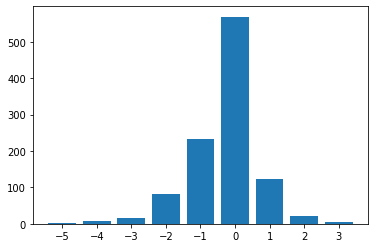

In [18]:
# plot terhadap data

labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()


#### Analysis

Keputusan PBSI yang mundur dari kejuaraan dunia bulu tangkis mendapat perhatian yang paling keras dari netizen. Sementara Menpora mengaku tidak ikut campur atas keputusan tersebut.
Meski ada pembelaan dari buzzer Menpora, secara umum sentimen masyarakat atas isu ini bersifat negatif. Artinya cuitan-cuitan pembelaan masih kalah banyak dengan hujatan netizen atas keputasan pemerintah tersebut.